<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/model9/pid_autoencoder_rekonstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 27.5 MB/s 
     |████████████████████████████████| 174 kB 57.1 MB/s 
     |████████████████████████████████| 182 kB 60.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 173 kB 51.9 MB/s 
     |████████████████████████████████| 168 kB 59.2 MB/s 
     |████████████████████████████████| 168 kB 69.3 MB/s 
     |████████████████████████████████| 166 kB 68.3 MB/s 
     |████████████████████████████████| 166 kB 61.4 MB/s 
     |████████████████████████████████| 162 kB 64.2 MB/s 
     |████████████████████████████████| 162 kB 62.1 MB/s 
     |████████████████████████████████| 158 kB 66.6 MB/s 
     |████████████████████████████████| 157 kB 67.1 MB/s 
     |████████████████████████████████| 157 kB 66.9 MB/s 
     |████████████████████████████████| 157 kB 62.6 MB/s 
     |███████████████████████████

In [4]:
import pandas as pd
import os
import seaborn as sns
import wandb

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#user = "Anna"
user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [8]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" 
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" 
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [9]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/
/content/drive/MyDrive/2022Anna/Datapipeline/5/


In [10]:
#df_good = pd.read_csv(path_good,usecols=None)
#df_bad = pd.read_csv(path_bad,usecols=None)

In [11]:
fname_good_list=["415_SC_error_part1.csv","415_SC_error_new_part1.csv","415_SC_error_new_part3.csv"]
fname_bad_list=["415_SC_error_part2.csv","415_SC_error_new_part2.csv","415_SC_error_new_part4.csv"]




In [12]:
_debug_=False

In [13]:
def df_create(df,csv_list,path_name):
    df2=df
    for fname in csv_list:
        pfname=path_name+fname
        if _debug_:
            print(pfname)
        df1=pd.read_csv(pfname,usecols=None)
        df2=pd.concat([df2,df1],axis=0,ignore_index=True)
        if _debug_:
            print(df2.tail(1))
    return df2


In [14]:
df_test1=pd.read_csv(path_good+fname_good_list[2])
df_test1.tail(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
655,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,0.216297,1.159305


In [15]:
df_all_good_new=pd.DataFrame()
df_all_good_new=df_create(df_all_good_new,fname_good_list,path_good)

In [16]:
df_all_bad_new=pd.DataFrame()
df_all_bad_new=df_create(df_all_bad_new,fname_bad_list,path_good)

In [17]:
df_all_bad_new.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2496,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185
2497,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185,0.239185


In [18]:

import matplotlib.pyplot as plot


In [19]:
from sklearn.preprocessing import MinMaxScaler
df_all=pd.concat([df_all_good_new,df_all_bad_new],axis=0,ignore_index=True)
scaler=MinMaxScaler()
scaler.fit(df_all)
good_scaled=scaler.transform(df_all_good_new)
bad_scaled=scaler.transform(df_all_bad_new)


In [20]:
df_good_scaled=pd.DataFrame(good_scaled,columns=df_all.columns)
df_bad_scaled=pd.DataFrame(bad_scaled,columns=df_all.columns)
df_good_scaled["state"]=0
df_bad_scaled["state"]=1

In [21]:
df_good_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
0,0.203312,0.000000,0.000000,0.149256,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
1,0.000000,0.155851,0.185726,0.339488,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
2,0.155851,0.312632,0.367803,0.516456,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
3,0.312632,0.466332,0.537185,0.546188,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
4,0.466332,0.609315,0.565642,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,...,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0.556316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,0.641484,0.641484,0.575293,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,...,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0
2074,0.641484,0.641484,0.575293,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,...,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0
2075,0.641484,0.641484,0.575293,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,...,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0
2076,0.641484,0.641484,0.575293,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,...,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0.556271,0


In [22]:
df_all_scaled=pd.concat([df_good_scaled,df_bad_scaled],axis=0)

In [23]:
df_all_scaled.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
2493,0.641667,0.641667,0.575509,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,...,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,1
2494,0.641667,0.641667,0.575509,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,...,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,1
2495,0.641667,0.641667,0.575509,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,...,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,1
2496,0.641667,0.641667,0.575509,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,...,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,1
2497,0.641667,0.641667,0.575509,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,...,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,0.556497,1


In [24]:
import wandb



In [372]:
prediktorok=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
X_NN=df_all_scaled[prediktorok][:]  # mindent megtanul
X_NN=df_good_scaled[prediktorok][:] # csak a jókat tanulja
y_NN=df_all_scaled["state"][:]
y_NN=df_good_scaled["state"][:] # csak a jók érdekelnek minket
X_NN_test=df_bad_scaled[prediktorok][:] #


In [236]:
'''
7 dimenzióra képez, a grafikus megjelenítés biztató
_N1_=135
_N2_=30
_N3_=7
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500
'''

'''
_N1_=135
_N2_=30
_N3_=2
_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=3500
'''
_N1_=13
_N2_=5
_N3_=3
_N4_=5
_N5_=13

_lr_=0.0001
_batch_size_=32
_drop1_=0.0
_drop2_=0.0
_epochs_=1000
_comment_="3 réteg:  20] 13 2 13 [20 "



In [237]:
config = {"lr": _lr_, "batch_size": _batch_size_,"architecture": "AutoencoderNN", 
          "depth": 2,
          "layer1":_N1_,  "layer2":_N2_,"layer3":_N3_,"layer4":_N2_,"layer5":_N1_,"layer_out":20, 
          "drop1":_drop1_,"drop2":_drop2_,
          "epochs":_epochs_,
          "comment": _comment_

          
          
          }

wandb.init(project="pid_autoencoder", entity="pid_status",config=config)


In [238]:
from keras.engine.base_layer import regularizers
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

clear_session()

kernel_reg_1=tf.keras.regularizers.L2(0.1)

input_size=20


input1=Input(shape=(input_size,))

l1_out=Dense(_N1_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(input1) # kernel_initializer='lecun_normal'  # L1

#l2_out=Dense(_N2_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l1_out) #kernel_initializer='lecun_normal',  # L2

l3_out=Dense(_N3_,activation="linear",kernel_initializer='glorot_uniform',name="encoded",kernel_regularizer=None)(l1_out) #kernel_initializer='lecun_normal',  # L3

#l4_out=Dense(_N4_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l3_out) #kernel_initializer='lecun_normal',  # L4

l5_out=Dense(_N5_,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=None)(l3_out) #kernel_initializer='lecun_normal',  # L5




pred=Dense(input_size, activation="sigmoid",)(l5_out)

model = Model(inputs=input1, outputs=pred)
optimizer=Adamax(learning_rate=_lr_,) #

model.compile(loss='MAE',
    optimizer=optimizer,
    metrics=["MAE"])

In [229]:
# autoencoder

In [239]:
model_file="model_PID__54_loss_0.116_vloss_0.115_acc_0.953_vacc_0.958.hdf5"
#model_file="model_PID__94_loss_0.116_vloss_0.115_acc_0.950_vacc_0.966.hdf5"
model_file="model_PID__4491_loss_0.115_vloss_0.679_acc_0.954_vacc_0.880.hdf5"

In [240]:
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [241]:
__load_file__=False

In [242]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X_NN,y_NN,train_size=len(X_NN)-1,shuffle=True,random_state=33)

In [244]:
len(X_NN)

2078

In [245]:
!rm *.hdf5 

In [246]:
def learning_rate_corrector(epoch,lr):
    
    if epoch > 4500:
        lr = 0.0001
        return lr
    
    if epoch > 4000:
        lr = 0.0005
        return lr
    

    if epoch > 3500:
        lr = 0.0001
        return lr
    
    
    if epoch > 3000:
        lr = 0.0005
        return lr
    

    if epoch > 2500:
        lr = 0.0001
        return lr
    

    if epoch > 2000:
        lr = 0.0005
        return lr
    
    if epoch > 1500:
        lr = 0.0001
        return lr
    
    if epoch > 1000:
        lr = 0.0001
        return lr
    
    if epoch > 500:
        lr = 0.0001
        return lr
    return lr
    

In [247]:
from wandb.keras import WandbMetricsLogger
fname="./model_Encoder_"
callbacks = [
        LearningRateScheduler(learning_rate_corrector,verbose=1),
        WandbMetricsLogger(),       
        #ModelCheckpoint(filepath=fname+"_{epoch:04.0f}"+"_loss_{loss:.3f}_vloss_{val_loss:.3f}_acc_{MAE:.3f}_vacc_{val_MAE:.3f}.hdf5", 
        #                monitor='loss', verbose=2, save_best_only=True, mode='min')
        ]


In [248]:
__learning__=True

In [249]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 13)                273       
                                                                 
 encoded (Dense)             (None, 3)                 42        
                                                                 
 dense_1 (Dense)             (None, 13)                52        
                                                                 
 dense_2 (Dense)             (None, 20)                280       
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [340]:
if __learning__: 
    history = model.fit(X_train, X_train, epochs=_epochs_, batch_size=_batch_size_, verbose=1,callbacks=callbacks)



Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0067 - MAE: 0.0067 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0067 - MAE: 0.0067 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0067 - MAE: 0.0067 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0067 - MAE: 0.0067 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 5/1000
65/65 [==============================] - 0s 2ms/step - loss: 0.0067 - MAE: 0.0067 - lr: 1.0000e-04

Epoch 6: LearningRateScheduler setting 

In [341]:
model.save("autoencoder_model_1_encoder.hdf5")

In [342]:
__load_file__=False
model_file="model_PID__0634_loss_0.086_vloss_1.253_acc_0.961_vacc_0.886.hdf5"
model_url="https://github.com/sipocz/pid_time_series/raw/main/model3/"+model_file

In [343]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [344]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [345]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [346]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [347]:
i1=model.get_layer("dense")

In [348]:
o1=model.get_layer("encoded")

In [349]:

from tensorflow.keras import backend as K

In [350]:
hidden_states_fun = K.function([i1.input],[o1.output])
     

In [351]:
def get_embedding(X):
    """Return the hidden state associated with an input at the given timestep.
    """
    
    hidden_states = hidden_states_fun(X.to_numpy())[0]
    
    return hidden_states
     

In [352]:
get_embedding(X_train)

array([[1.2829659 , 0.17489855, 1.6867675 ],
       [1.250036  , 0.17534363, 1.670266  ],
       [1.2501379 , 0.17540957, 1.670457  ],
       ...,
       [1.2498273 , 0.17521976, 1.6699737 ],
       [1.2502682 , 0.17534773, 1.6705312 ],
       [1.2900369 , 0.15751263, 1.7104484 ]], dtype=float32)

In [353]:
hs=hidden_states_fun(X_train.to_numpy())[0]

In [354]:
len(hs)

2077

In [355]:
hs[3].tolist()

[1.2627817392349243, 0.16531555354595184, 1.6838270425796509]

In [356]:
X_train.iloc[1:2,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
957,0.641246,0.641665,0.575011,0.556494,0.556494,0.556494,0.556494,0.556494,0.555976,0.556105,0.556235,0.556365,0.556494,0.555976,0.556494,0.555976,0.555976,0.555976,0.556494,0.556494


In [357]:
embedding_list=get_embedding(X_train)

In [358]:
len(embedding_list)

2077

In [359]:
def color_changer(arr):
    o=["r" if i>0.5 else "g" for i in arr]
    return o

In [360]:
embedding_list[:][0]

array([1.2829659 , 0.17489855, 1.6867675 ], dtype=float32)

In [361]:
embedding_list[:][-100]

array([1.2670853 , 0.21940425, 1.7292742 ], dtype=float32)

In [362]:
def plot_embedding(list_in, predicted, index2=1):
    xkoordinata=[i[0] for i in list_in]
    ykoordinata=[i[index2] for i in list_in]
    
    plot.figure(figsize=(12,6))
    col_ch=color_changer(predicted)
    plot.scatter(xkoordinata,ykoordinata,c=col_ch,marker=".",alpha=0.3)
    plot.ylabel('értékek')
    plot.xlabel('index')
    plot
    plot.show()

In [363]:
def plot_embedding_3d(list_in, predicted):
    import plotly.express as px

    xkoordinata=[i[0] for i in list_in]
    ykoordinata=[i[1] for i in list_in]
    zkoordinata=[i[2] for i in list_in]
    zipped=list(zip(xkoordinata,ykoordinata,zkoordinata))
    df_tmp=pd.DataFrame(zipped,columns=["x","y","z"])
    df_tmp["pred"]=predicted.tolist()
    fig = px.scatter_3d(df_tmp, x='x', y='y', z='z', color='pred', width=1200, height=1000,opacity=0.8)
    
    fig.show()




In [364]:
y_train.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [365]:
plot_embedding_3d(embedding_list[:],y_train[:])

In [385]:
embedding_list[0]

array([1.2829659 , 0.17489855, 1.6867675 ], dtype=float32)

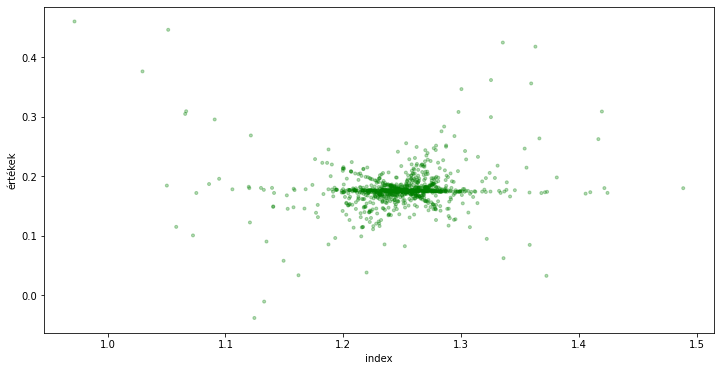

In [367]:
plot_embedding(embedding_list[:],y_train[:],index2=1)

In [431]:
# rekonstrukciós hiba számítása

from sklearn.metrics import mean_absolute_error, mean_squared_error

X_NN_test_predicted=model.predict(X_NN_test)
y_MAE=[]
for i in range(len(X_NN_test)):
    y_MAE_calc=mean_absolute_error(X_NN_test_predicted.tolist()[i],X_NN_test.to_numpy().tolist()[i])
    y_MAE.append(y_MAE_calc)


79/79 [==============================] - 0s 1ms/step


In [432]:
def color_changer(arr):
    o=["r" if i>0.5 else "g" for i in arr]
    return o

In [433]:
def plotgraf(list_in):
    xkoordinata=[i for i in range(len(list_in))]
    plot.figure(figsize=(12,6))
    #col_ch=color_changer(predicted)
    plot.scatter(xkoordinata,list_in,c="r",marker=".",alpha=0.3)
    plot.ylabel('értékek')
    plot.xlabel('index')
    plot
    plot.show()

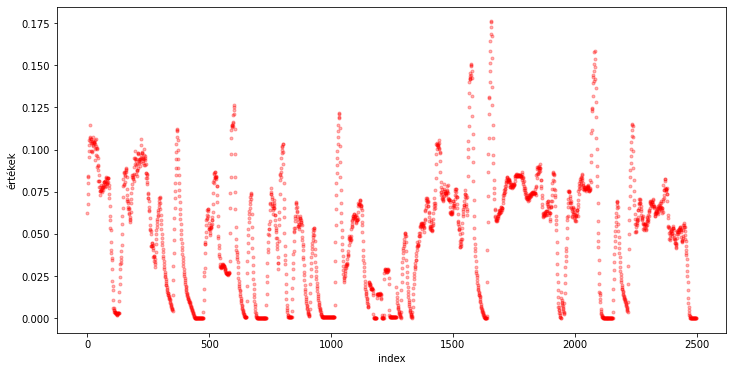

In [430]:
plotgraf(y_MAE)

In [448]:
X_NN_test_list=X_NN_test.to_numpy().tolist()

In [455]:
X_NN_test_list_0=[i[0] for i in X_NN_test_list]

In [ ]:
X_NN_test_list_0

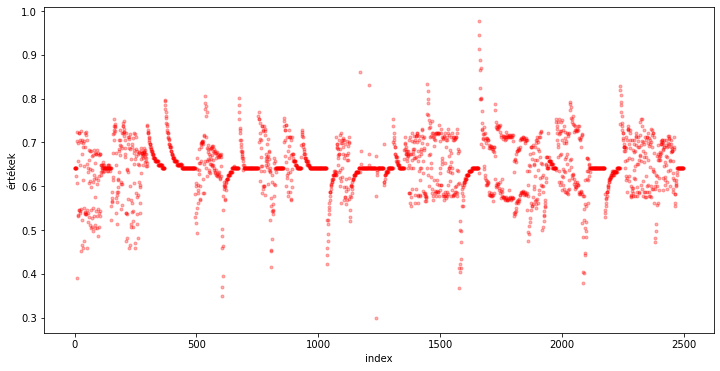

In [457]:
plotgraf(X_NN_test_list_0)

In [437]:
plotgraf(X_NN_test_predicted.tolist())

TypeError: ignored

0.04919239153766045

In [415]:
def grafikon3(fx,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,99,0.8)',title=None):
    '''
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+" "+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(specs=[[{"secondary_y": True}]])


    if ngraf>=3:
        fig0.add_trace(
            go.Bar(x=fx.index, y=fx[desc3], marker_color='rgba(225, 20, 20,0.2)',  name=txt3, showlegend=True, ),
              secondary_y=False,
            #row=1, col=1
        )


    if ngraf>=2:
        fig0.add_trace(
            go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            secondary_y=False,
            #row=1, col=1

        )

    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),
        secondary_y=False,
        #row=1, col=1

    )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    print(title)
    fig0.update_yaxes(title_text="<b>"+title+"</b>", secondary_y=False)
    #fig0.update_yaxes(title_text="<b>Alarm státusz</b>", secondary_y=True)
    fig0.update_layout(paper_bgcolor='rgb(200,200,200)')
    fig0.show()

In [416]:

history_df=pd.DataFrame({"x":X_NN_test, "y":y_NN})

ValueError: ignored

In [ ]:
grafikon3(history_df,"loss","Loss","val_loss","Val_Loss",title=None)